In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import pprint
import gensim
import gensim.downloader
import spacy
import re
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import random_split
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [ ]:
path1 = open('/content/drive/MyDrive/ProjectData/pos.txt','r')
path2 = open('/content/drive/MyDrive/ProjectData/neg.txt','r')
positive = path1.readlines()
negative = path2.readlines()
print(positive[0])
print(negative[0])

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 

simplistic , silly and tedious . 



In [ ]:
trueLabel = []
for i in range(0,5000):
  trueLabel.append(1)
for i in range(0,5000):
  trueLabel.append(0)

In [ ]:
# trainData = []
# trueLabel = []
# for sentence in postive:
#   preprocessed_text=gensim.utils.simple_preprocess(sentence, deacc=False, min_len=2, max_len=15)
#   trainData.append(preprocessed_text)
#   trueLabel.append(1)
# # trainData[0]

In [ ]:
# for sentence in negative:
#   preprocessed_text=gensim.utils.simple_preprocess(sentence, deacc=False, min_len=2, max_len=15)
#   trainData.append(preprocessed_text)
#   trueLabel.append(0)

In [ ]:
# len(trainData)

10000

In [ ]:
temp1 = list(nlp.pipe(positive))
temp2 = list(nlp.pipe(negative))

In [ ]:
pos_vec = []
for i in temp1:
  t = [0]*300
  t = np.array(t)
  for j in i:
    t = t + j.vector
  t = t / (len(i))
  pos_vec.append(t)


In [ ]:
neg_vec = []
for i in temp2:
  t = [0]*300
  t = np.array(t)
  for j in i:
    t = t + j.vector
  t = t / (len(i))
  neg_vec.append(t)

In [ ]:
data = np.concatenate((pos_vec, neg_vec), axis = 0)
data.shape

(10000, 300)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

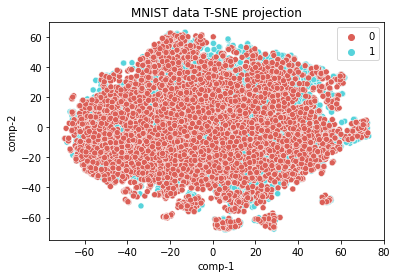

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
z = tsne.fit_transform(data)
df = pd.DataFrame()
df["y"] = trueLabel
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="MNIST data T-SNE projection")

In [ ]:
trueLabel = np.array(trueLabel)
data = np.array(data)
print(trueLabel.shape)
print(data.shape)

(10000,)
(10000, 300)


In [ ]:
train_x = torch.Tensor(data)
train_y = torch.Tensor(trueLabel)
train_y = train_y.type(torch.LongTensor)
my_dataset = TensorDataset(train_x,train_y)
training, validation = random_split(my_dataset, [8000, 2000])
# trainingData = DataLoader(training, batch_size = 100, shuffle=True)
# validationData = DataLoader(validation, batch_size = 512, shuffle=True)

In [ ]:
input_size = 300
hidden_size = [128, 64]
num_classes = 2
num_epochs = 200
batch_size = 500
learning_rate = 0.1 

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=training, batch_size=32, shuffle=True)

In [ ]:
val_loader = torch.utils.data.DataLoader(dataset=validation, batch_size=1000, shuffle=True)

In [ ]:
class NeuralNet(nn.Module):
     def __init__(self, input_size, hidden_size, num_classes):
         super(NeuralNet, self).__init__()
         self.input_size = input_size
         self.l1 = nn.Linear(input_size, 512) 
         self.dropout = nn.Dropout(0.15)
         self.relu1 = nn.Tanh()
         self.l2 = nn.Linear(512, 512)
         self.dropout2 = nn.Dropout(0.15)
         self.relu2=nn.Tanh()
         self.l3 = nn.Linear(512,num_classes)
         self.softmax=nn.Softmax(dim=1)
     def forward(self, x):
         out = self.l1(x)
         out = self.dropout(out)
         out = self.relu1(out)
         out = self.l2(out)
         out = self.dropout2(out)
         out = self.relu2(out)
         out = self.l3(out)
         out = self.softmax(out)
         return out


In [ ]:
DAN2Layer = NeuralNet(300, 512, 2)

In [ ]:
optimiser = optim.SGD(DAN2Layer.parameters(), lr = 0.01)
lossFunction = nn.CrossEntropyLoss()

In [ ]:
def plotLossCurve(flag, trainLossListPlotting, validLossListPlotting):
    x = [(i+1) for i in range(epochs+1)]
    plt.xlabel('#Epoch')
    plt.ylabel('Loss')
    tempStr = "Loss curve for "
    if(flag == 0):
        tempStr += "Train Data"
        plt.plot(x, trainLossListPlotting)
    else:
        tempStr += "Validation Data"
        plt.plot(x, validLossListPlotting)
    plt.title(tempStr)
    plt.show()

Epoch 1 Training Loss: 10.529921170324087 Validation Loss: 0.6562917232513428 accuracy: 0.621999979019165
Epoch 2 Training Loss: 10.021173361688852 Validation Loss: 0.6318734288215637 accuracy: 0.6625000238418579
Epoch 3 Training Loss: 9.6790453158319 Validation Loss: 0.6143767237663269 accuracy: 0.6880000233650208
Epoch 4 Training Loss: 9.4312779083848 Validation Loss: 0.6026611924171448 accuracy: 0.699999988079071
Epoch 5 Training Loss: 9.256056252866983 Validation Loss: 0.5933985114097595 accuracy: 0.7139999866485596
Epoch 6 Training Loss: 9.12394317612052 Validation Loss: 0.5951544046401978 accuracy: 0.6800000071525574
Epoch 7 Training Loss: 9.019874669611454 Validation Loss: 0.5926693081855774 accuracy: 0.6840000152587891
Epoch 8 Training Loss: 8.949713295325637 Validation Loss: 0.5785165429115295 accuracy: 0.7164999842643738
Epoch 9 Training Loss: 8.877023866400123 Validation Loss: 0.5749589204788208 accuracy: 0.7245000004768372
Epoch 10 Training Loss: 8.813207121565938 Validatio

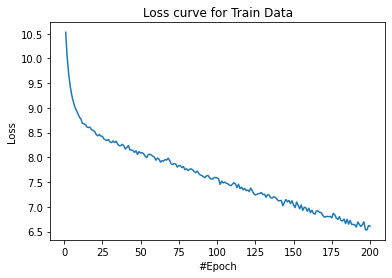

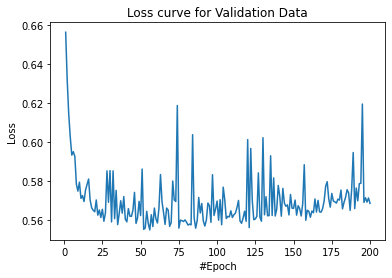

In [ ]:
numberOfEpochs = 200
trainLossList = []
valLossList = []
for epochs in range(0, numberOfEpochs):
  train_loss=0
  val_loss=0
  acc=0
  for i, (x, y) in enumerate(train_loader):
    forwardValue = DAN2Layer(x)
    J = lossFunction(forwardValue, y)
    DAN2Layer.zero_grad()
    J.backward()
    optimiser.step()
    train_loss=train_loss+ J.item()

  for batch in val_loader:
    DAN2Layer.eval()
    x, y = batch
    forwardValue = DAN2Layer(x)
    J = lossFunction(forwardValue, y)
    out = torch.argmax(forwardValue, dim=1)
    val_loss = val_loss + J.item()
    acc = acc + torch.sum(out == y)
 
  print(f'Epoch {epochs+1} Training Loss: {train_loss/16} Validation Loss: {val_loss} accuracy: {acc/2000}')
  trainLossList.append(train_loss/16)
  valLossList.append(val_loss)
plotLossCurve(0, trainLossList, valLossList)
plotLossCurve(1, trainLossList, valLossList)

In [ ]:
path = open('/content/drive/MyDrive/DLNLP_ASS-1/Assignment1/testData.txt','r')
testData = path.readlines()

In [ ]:
y = []
for i in range(0,331):
  y.append(1)
for i in range(0,331):
  y.append(0)

In [ ]:
temp = list(nlp.pipe(testData))
test = []
for i in temp:
  t = [0]*300
  t = np.array(t)
  for j in i:
    t = t + j.vector
  t = t / (len(i))
  test.append(t)

In [ ]:
y = np.array(y)
test = np.array(test)
print(y.shape)
print(test.shape)

(662,)
(662, 300)


In [ ]:
test = torch.Tensor(test)
y = torch.Tensor(y)
y = y.type(torch.LongTensor)
my_dataset = TensorDataset(test,y)

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=my_dataset, batch_size=32, shuffle=True)

In [ ]:
len(test_loader)

21

In [ ]:
accuracyListPred = []
for batch in test_loader:
  x, y = batch
  forwardValue = DAN2Layer(x)
  J = lossFunction(forwardValue, y)
  out = torch.argmax(forwardValue, dim=1)
  accuracyListPred.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
accuracy = torch.tensor(accuracyListPred).mean() * 100
print('\033[1m' + "Review Classification Accuracy on Test Data = ", "{:.2f}".format(accuracy), " %" + '\033[0m' )

Review Classification Accuracy on Test Data =  75.11  %
